In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os
import seaborn as sns

def cuadro_estadisticas(serie):
    mean = serie.mean()
    g56  = (serie.loc[1956] - serie.loc[1952]) / serie.loc[1952] * 100
    return (f"Crisis (1952‑1955)\nMediana: {mean:.2f}\n"
            f"Δ56/52: {g56:.1f}%")

def cuadro_estadisticas_post(serie):
    mean = serie.loc[1956:1982].mean()
    g56  = 0                                 # ya es el punto inicial post‑crisis
    g82  = (serie.loc[1982] - serie.loc[1956]) / serie.loc[1956] * 100
    return (f"Post (1956‑1982)\nMediana: {mean:.2f}\n"
            f"Δ82/56: {g82:.1f}%")
# Configuración de estilo profesional
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'figure.dpi': 150,
    'savefig.bbox': 'tight'
})
# Conexión a la base de datos y carga de datos de exportaciones minerales
conn = sqlite3.connect('../../../db/proyectomacro.db')
df_minerales = pd.read_sql_query("SELECT * FROM exportaciones_minerales_totales", conn)
conn.close()

# Establecer el índice 'año' y recortar al periodo de 1952 a 1982
df_minerales.set_index('año', inplace=True)
df_minerales = df_minerales.loc[1952:1982]

# Calcular 'valor_total' a partir de las columnas de valor y ajustar escala (en millones)
valor_cols = ['estaño_valor', 'plomo_valor', 'zinc_valor', 'plata_valor', 
              'wolfram_valor', 'cobre_valor', 'antimonio_valor', 'oro_valor']
df_minerales["valor_total"] = df_minerales[valor_cols].sum(axis=1) / 1000
# Para minerales se define que el periodo 1952-1955 es "Crisis" y 1956-1982 es "Post Crisis"
df_crisis = df_minerales.loc[1952:1956]
df_post   = df_minerales.loc[1956:1982]
df_full   = df_minerales  # Periodo completo para anotaciones



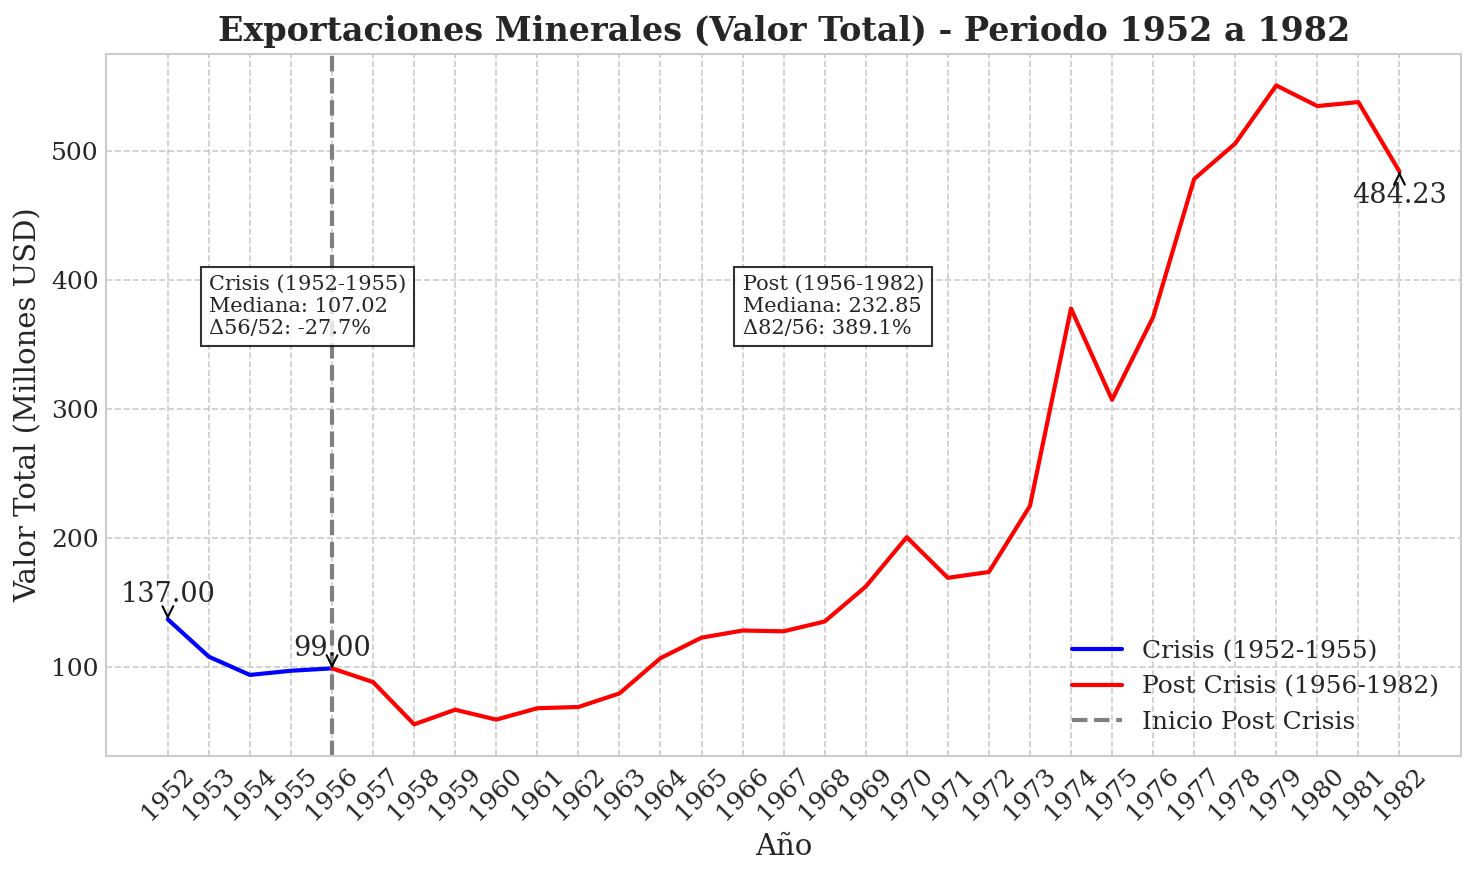

In [6]:
# Crear figura y eje
fig, ax = plt.subplots(figsize=(10,6))

# Graficar el segmento "Crisis" (1952-1955) en un color (por ejemplo, morado)
ax.plot(df_crisis.index, df_crisis['valor_total'], color='blue', label='Crisis (1952-1955)')

# Graficar el segmento "Post Crisis" (1956-1982) en rojo
ax.plot(df_post.index, df_post['valor_total'], color='red', label='Post Crisis (1956-1982)')

# Línea vertical separadora en 1956
ax.axvline(x=1956, color='gray', linestyle='--', linewidth=2, label='Inicio Post Crisis')

# Anotaciones en años clave (1952, 1956 y 1982)
for year in [1952, 1956, 1982]:
    if year in df_full.index:
        value = df_full.loc[year, 'valor_total']
        if year == 1982:
            # Para 1982 se anota ligeramente por debajo
            ax.annotate(f"{value:.2f}", xy=(year, value), xytext=(year, value * 0.95),
                        arrowprops=dict(facecolor='black', arrowstyle='->'),
                        fontsize=13, ha='center')
        else:
            # Para 1952 y 1956 se anotan por encima
            ax.annotate(f"{value:.2f}", xy=(year, value), xytext=(year, value * 1.1),
                        arrowprops=dict(facecolor='black', arrowstyle='->'),
                        fontsize=13, ha='center')

# Cuadros de estadísticas descriptivas
ax.text(1953, df_full['valor_total'].max() * 0.65, cuadro_estadisticas(df_crisis['valor_total']),
        fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
ax.text(1966, df_full['valor_total'].max() * 0.65, cuadro_estadisticas_post(df_post['valor_total']),
        fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

# Etiquetas, título y leyenda
ax.set_title('Exportaciones Minerales (Valor Total) - Periodo 1952 a 1982', fontweight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('Valor Total (Millones USD)')
ax.legend()

plt.xticks(df_minerales.index,rotation=45)
plt.tight_layout()

# Guardar la imagen en la ruta actualizada
output_dir = "../../../assets/tesis/intervensionismo_estatal/serie_completa"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
plt.savefig(os.path.join(output_dir, "minerales.png"))
plt.show()